In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd






%matplotlib notebook

In [2]:
G = nx.karate_club_graph()

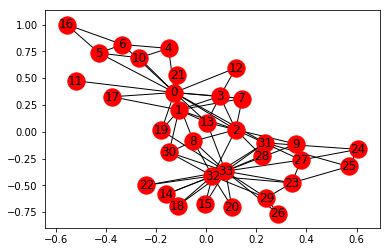

In [3]:
plt.figure()
nx.draw_networkx(G)

In [4]:
from operations import Operations

Opobj = Operations(G,'operations.yaml')
Opobj.load_yaml()
#Opobj.G
Opobj.feature_extraction()





In [5]:
Opobj.feature_names

[['BS_num_nodes',
  'BS_num_edges',
  'BS_degree_mean',
  'BS_degree_median',
  'BS_degree_std'],
 ['CL_num_triangles',
  'CL_transitivity',
  'CL_clustering_mean',
  'CL_clustering_std',
  'CL_clustering_median',
  'CL_square_clustering_mean',
  'CL_square_clustering_std',
  'CL_square_clustering_median'],
 ['DC_mean_10',
  'DC_std_10',
  'DC_opt_model_10',
  'DC_powerlaw_a_10',
  'DC_powerlaw_SSE_10'],
 ['DC_mean_20',
  'DC_std_20',
  'DC_opt_model_20',
  'DC_powerlaw_a_20',
  'DC_powerlaw_SSE_20'],
 ['DC_mean_50',
  'DC_std_50',
  'DC_opt_model_50',
  'DC_powerlaw_a_50',
  'DC_powerlaw_SSE_50'],
 ['EC_mean_10',
  'EC_std_10',
  'EC_opt_model_10',
  'EC_powerlaw_a_10',
  'EC_powerlaw_SSE_10'],
 ['EC_mean_20',
  'EC_std_20',
  'EC_opt_model_20',
  'EC_powerlaw_a_20',
  'EC_powerlaw_SSE_20'],
 ['EC_mean_50',
  'EC_std_50',
  'EC_opt_model_50',
  'EC_powerlaw_a_50',
  'EC_powerlaw_SSE_50'],
 ['MC_num_comms_greedy_mod',
  'MC_mod_val_greedy_mod',
  'MC_ratio_max_min_num_nodes',
  'MC_rat

In [6]:
Opobj.feature_vals

[[34, 78, 16.5, 16.5, 9.810708435174291],
 [3.9705882352941178,
  0.2556818181818182,
  0.5706384782076823,
  0.342266011779565,
  0.5,
  0.2881950378613188,
  0.25735167066472164,
  0.22532863849765258],
 [0.1390374331550802,
  0.11576850539129781,
  3,
  0.030303030303030297,
  159.91517479998447],
 [0.1390374331550802,
  0.11576850539129781,
  3,
  0.030303030303030297,
  123.63439046577764],
 [0.1390374331550802,
  0.11576850539129781,
  3,
  0.030303030303030297,
  281.6316253244738],
 [0.14641130364006763,
  0.08930562620741357,
  3,
  -0.011337942017095266,
  67.76939156111158],
 [0.14641130364006763,
  0.08930562620741357,
  3,
  -0.011337942017095266,
  68.37518935432425],
 [0.14641130364006763,
  0.08930562620741357,
  3,
  -0.011337942017095266,
  252.35978156173394],
 [3, 0.3806706114398414, 2.125, 1.8888888888888888],
 [2.152249134948097, 1.2985233003150884, 2.0, 12.0, 0.0, 2, 2, 2, 1351.0],
 [74.72727272727273, 24.870906366095195, 85.0, 116.0, -20.0, 4],
 [0.4541749865340

In [8]:
from hcga.graphs import Graphs

graphs_obj = Graphs()

FileNotFoundError: [Errno 2] No such file or directory: 'TestData/ENZYMES/ENZYMES_graph_indicator.txt'

In [14]:
        # extract the precomputed eigenvectors from the operations object
import scipy as sp
eigenvector = Opobj.eigenvectors[:,0]
largest = eigenvector.flatten().real
eigenvector_centrality = sp.sign(largest.sum()) * sp.linalg.norm(largest)
largest

array([0.35549144, 0.26595992, 0.3171925 , 0.21117972, 0.07596882,
       0.07948305, 0.07948305, 0.17095975, 0.22740391, 0.10267425,
       0.07596882, 0.0528557 , 0.08425463, 0.22647272, 0.10140326,
       0.10140326, 0.02363563, 0.09239954, 0.10140326, 0.14791251,
       0.10140326, 0.09239954, 0.10140326, 0.15011857, 0.05705244,
       0.05920647, 0.07557941, 0.13347715, 0.13107782, 0.13496082,
       0.1747583 , 0.19103384, 0.30864422, 0.37336347])

In [10]:
import yaml

with open("operations.yaml", 'r') as stream:
    operations_dict = yaml.load(stream)

In [11]:
from importlib import import_module

operation = operations_dict['BasicStats']
main_params = ['filename','classname','shortname','keywords']
filename = operation[main_params[0]]
classname = operation[main_params[1]]
cls = getattr(import_module(filename), classname)
cls = cls(G)
cls.feature_extraction()
cls.features
cls.feature_names

['num_nodes', 'num_edges', 'degree_mean', 'degree_median', 'degree_std']

In [12]:



feature_names = []
features = []

        # loop over the feature classes defined in the YAML file
for i, key in enumerate(operations_dict.keys()):
    operation = operations_dict[key]

    #Extract the filename and class name
    main_params = ['filename','classname','shortname','keywords']
    filename = operation[main_params[0]]
    classname = operation[main_params[1]]
    symbolic_name = operation[main_params[2]]
    keywords = operation[main_params[3]]

    # Extracting all additional arguments if they exist
    params = []
    args = list(operation.keys() - main_params)
    for arg in args:
        params.append(operation[arg])

    print(filename)
    # import the class from the file
    feature_obj = getattr(import_module(filename), classname)
    feature_obj = feature_obj(G)
    
    if not params:
        feature_obj.feature_extraction()
    else: 
        feature_obj.feature_extraction(params)
    
    
    # Alter the feature feature_names
    f_names = feature_obj.feature_names
    f_names_updated = [symbolic_name + f_name for f_name in f_names]

    # Append the altered feature names and the feature list of values
    feature_names.append(f_names_updated)
    features.append(feature_obj.features)


basic_stats
triangles
centrality_degree
centrality_degree
centrality_degree


In [20]:
params

[50, 45]

In [7]:
Opobj.feature_names

[['BS_num_nodes',
  'BS_num_edges',
  'BS_degree_mean',
  'BS_degree_median',
  'BS_degree_std'],
 ['TS_num_triangles',
  'TS_transitivity',
  'TS_clustering_mean',
  'TS_clustering_std',
  'TS_clustering_median',
  'TS_square_clustering_mean',
  'TS_square_clustering_std',
  'TS_square_clustering_median'],
 ['mean_10', 'std_10', 'opt_model_10', 'powerlaw_a_10', 'powerlaw_SSE_10'],
 ['mean_20', 'std_20', 'opt_model_20', 'powerlaw_a_20', 'powerlaw_SSE_20'],
 ['mean_50', 'std_50', 'opt_model_50', 'powerlaw_a_50', 'powerlaw_SSE_50']]